# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [3]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [6]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [7]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [8]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [10]:
X = df.iloc[:,:-1]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [11]:
Y = df.iloc[:,-1]
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

### Choose the model (Linear Regression)

In [13]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [14]:
R = LinearRegression()

### Train the model

In [15]:
R.fit(X_train,Y_train)

LinearRegression()

### Apply the model

In [16]:
A = R.predict(X_test)
A

array([39.09184855, 12.82614768, 41.76173828, 12.09424855, 41.68156196,
       39.36666405, 40.57898977, 33.8846898 , 50.05358688, 45.550874  ,
       45.51385485, 40.95300388, 38.33135922, 39.89670897, 46.59039145,
       38.21070994, 39.78636257, 40.74697578, 41.30341084, 42.31380145,
       49.36104125])

### Display the coefficients

In [19]:
R.coef_

array([-3.28281240e-03,  5.18980590e+00, -2.70389960e-01, -4.34076666e-03,
        1.16918512e+00,  2.26156387e+02, -5.63794054e+00])

### Find how well the trained model did with testing data

In [20]:
from sklearn.metrics import r2_score
print('r2 score :', r2_score(Y_test, A))

r2 score : 0.7065810721724484


### Plot House Age Vs Price
#### Hint: Use regplot in sns

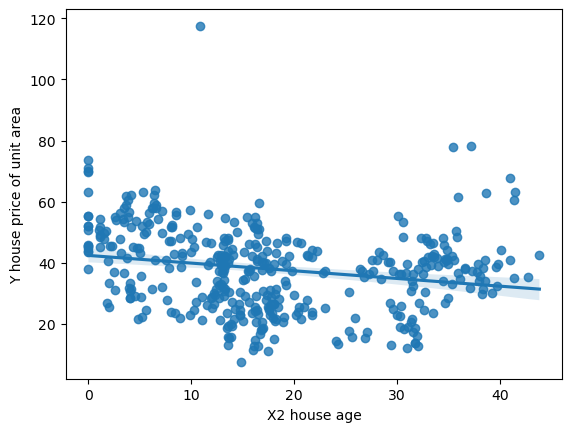

In [21]:
sns.regplot(x = "X2 house age", y = "Y house price of unit area", data = df);

### Plot Distance to MRT station Vs Price

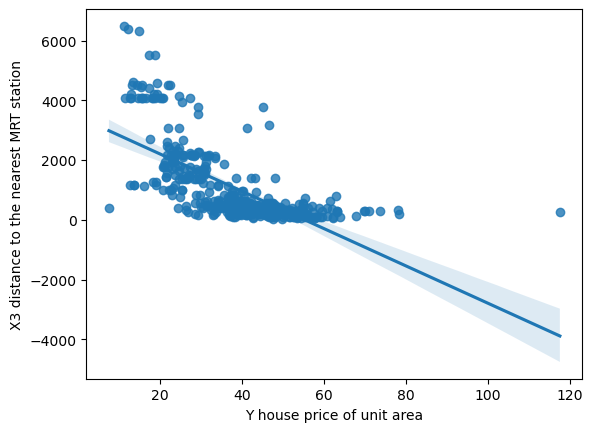

In [24]:
sns.regplot(x = "Y house price of unit area", y ="X3 distance to the nearest MRT station", data = df);

### Plot Number of Convienience Stores Vs Price

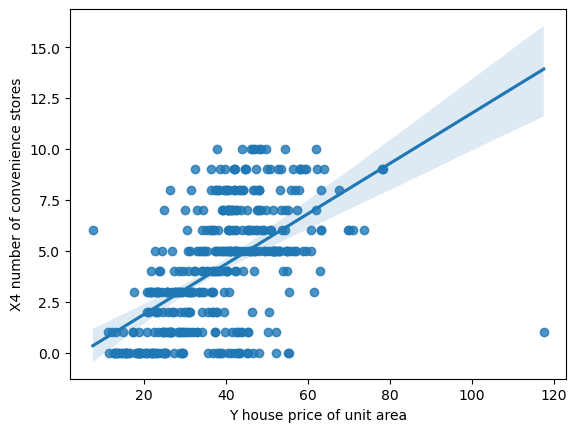

In [26]:
sns.regplot(x = "Y house price of unit area", y = "X4 number of convenience stores", data = df);